# Reinforcement Learning

Outline
1. Path finding example
2. Getting started with Gym
3. Designing AI agent
4. Exercise
5. References

### 1. Path finding example

In [14]:
from locale import currency
import numpy as np

R = np.matrix([[-1,-1,-1,-1,0,-1],
               [-1,-1,-1,0,-1,100],
               [-1,-1,-1,0,-1,-1],
               [-1,0,0,-1,0,-1],
               [-1,0,0,-1,-1,100],
               [-1,0,-1,-1,0,100]])

Q=np.matrix(np.zeros([6,6]))

alpha = 0.8

initial_state=1

def available_actions(state):
    curr_state_row = R[state,]
    av_act = np.where(curr_state_row>=0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act))
    return next_action

action = sample_next_action(available_act)

def update (current_state, action, alpha):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]

    if (max_index.shape[0] > 1):
        max_index = int (np.random.choice(max_index))
    else:
        max_index = max_index[0]
    max_value = Q[action, max_index]

    #Q learning formula
    Q[current_state,action] = R[current_state, action] + alpha*max_value

update(initial_state, action, alpha)

# TRAINING
for i in range (10000):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, alpha)

print("Trained Q matrix")
print(Q/np.max(Q)* 100)

# TESTING
goal_state = 5
current_state = 2
steps = [current_state]

while current_state != goal_state:
    next_step_index = np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index=int(np.random.choice(next_step_index))
    else:
        next_step_index = next_step_index[0]
    steps.append(next_step_index)
    current_state  =  next_step_index

print("Selected path")
print(steps)

Trained Q matrix
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]
Selected path
[2, 3, 4, 5]


In [ ]:
action = 2
print(current_state, action)
def update (current_state, action, alpha):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    print(Q[action,])
    print(np.max(Q[action,]))
    print(max_index)

    if (max_index.shape[0] > 1):
        max_index = int (np.random.choice(max_index))
    else:
        max_index = max_index[0]
    max_value = Q[action, max_index]
    print(max_value)

    #Q learning formula
    Q[current_state,action] = R[current_state, action] + alpha*max_value

print(Q)
update(initial_state, action, alpha)

### 2. Getting started with Gym

In this part, we install the necessary packages and <br>
1) create an environment <br>
2) draw the current state (observation) <br>
3) create a default loop to interact with the environment


In [ ]:
# install the library
!pip install gymnasium
!pip install pygame
!pip install matplotlib

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt 
import random

# Initialize environment
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
The action space: Discrete(2)


The initial observation is [0.04771857 0.01951293 0.03574747 0.02476344]


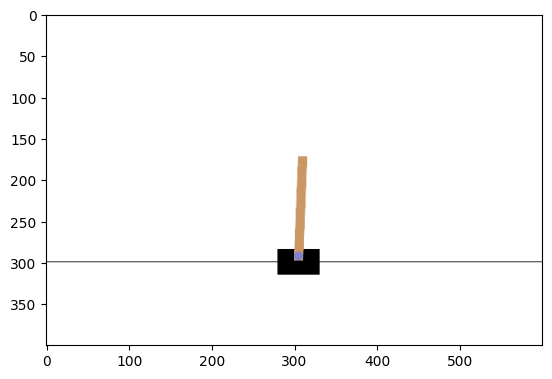

In [12]:
# reset the environment and see the initial observation
obs, info = env.reset()
print("The initial observation is {}".format(obs))

# Draw the current state (observation)
env_screen = env.render()
env.close()

plt.imshow(env_screen)

In [10]:
# Main (default) loop of the simulation
for i in range(1000):
    # get sample action from action space
    action = env.action_space.sample() 

    # apply selected action 
    # get new observation and reward
    # status if terminated or truncated, and other debug info
    observation, reward, terminated, truncated, info = env.step(action)
    print("step: %d"%i, observation, reward, terminated, truncated,)

    if terminated or truncated:
        observation, info = env.reset()
        break
        

step: 0 [-0.01934795 -0.16680086  0.01201243  0.27526724] 1.0 False False
step: 1 [-0.02268397 -0.3620921   0.01751778  0.5717146 ] 1.0 False False
step: 2 [-0.02992581 -0.16722013  0.02895207  0.28460142] 1.0 False False
step: 3 [-0.03327022  0.02747718  0.03464409  0.00118855] 1.0 False False
step: 4 [-0.03272067 -0.16812405  0.03466786  0.30459768] 1.0 False False
step: 5 [-0.03608315 -0.36372244  0.04075982  0.6080093 ] 1.0 False False
step: 6 [-0.0433576  -0.16919336  0.05292001  0.32843807] 1.0 False False
step: 7 [-0.04674147 -0.3650272   0.05948877  0.6373288 ] 1.0 False False
step: 8 [-0.05404201 -0.560926    0.07223534  0.9481367 ] 1.0 False False
step: 9 [-0.06526054 -0.75694233  0.09119807  1.262613  ] 1.0 False False
step: 10 [-0.08039938 -0.56309706  0.11645034  0.9998286 ] 1.0 False False
step: 11 [-0.09166132 -0.36970785  0.13644691  0.74586844] 1.0 False False
step: 12 [-0.09905548 -0.5664223   0.15136428  1.0781887 ] 1.0 False False
step: 13 [-0.11038393 -0.3735879   

In [ ]:
# Draw the current state (observation)
env_screen = env.render()
env.close()

plt.imshow(env_screen)

### 3. Designing AI Agent

In this part, we create a class for our Agent that is not learning anything yet, <br>
but selects his actions randomly given the state.

In [13]:
from time import sleep
import gymnasium as gym
import random

# Initialize environment
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

class Agent():
    def __init__(self, env):
        self.action_size = env.action_space.n
        
    def get_action(self, state):
        # select a random action
        action = random.choice(range(self.action_size))
        
        # extract a pole angle from state
        pole_angle = state[2]

        # select action based on the pole angle
        # 0 - Push cart to the left 
        # 1 - Push cart to the right
        action = 0 if pole_angle < 0 else 1 
        return action

agent = Agent(env)
state, _ = env.reset()
print("Reset state: ", state)

for i in range(100):
    action = agent.get_action(state)
    state, reward, done, trunc, info = env.step(action)
    print("State at %d:" % i, state)
    print(reward,state,done)

    if done:
        env.reset()
        env.close()
        break
    
    env.render()
    if reward<1:
        sleep(3)
        break
env.close()

Reset state:  [-0.01227121 -0.04632531 -0.00631484  0.00064845]
State at 0: [-0.01319772 -0.24135612 -0.00630187  0.2913323 ]
1.0 [-0.01319772 -0.24135612 -0.00630187  0.2913323 ] False
State at 1: [-1.8024843e-02 -4.3638766e-01 -4.7522088e-04  5.8202106e-01]
1.0 [-1.8024843e-02 -4.3638766e-01 -4.7522088e-04  5.8202106e-01] False
State at 2: [-0.02675259 -0.6315029   0.0111652   0.8745542 ]
1.0 [-0.02675259 -0.6315029   0.0111652   0.8745542 ] False
State at 3: [-0.03938266 -0.43653455  0.02865629  0.58540237]
1.0 [-0.03938266 -0.43653455  0.02865629  0.58540237] False
State at 4: [-0.04811335 -0.24182546  0.04036433  0.30188245]
1.0 [-0.04811335 -0.24182546  0.04036433  0.30188245] False
State at 5: [-0.05294985 -0.04730136  0.04640198  0.02219786]
1.0 [-0.05294985 -0.04730136  0.04640198  0.02219786] False
State at 6: [-0.05389588  0.14712548  0.04684594 -0.2554912 ]
1.0 [-0.05389588  0.14712548  0.04684594 -0.2554912 ] False
State at 7: [-0.05095337  0.34154835  0.04173611 -0.533037

### 4. Exercise
Implement Q-learning for CartPole task in Gym.<br>

There is a sample implementation (but uses outdated packages): <br>
https://github.com/nnqomariyah/aima-python/blob/master/gym-cartpole-qlearning.py

### 5. References

1. Slides for week 7 - Reinforcement Learning
2. https://github.com/aimacode/aima-python
3. https://github.com/nnqomariyah/aima-python (forked)
